In [5]:
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt
import skimage
import os


In [ ]:
#find the file names in the given directory and sort them into alphabetical order, these will be loaded
directory = "Images2"
files = sorted(os.listdir(directory))

try:
     ims = [Image.open(directory + "\\" + f).convert('L') for f in files]
     print(f"{len(ims)} Files Loaded")
except Exception as e:
     print("Files failed to load")
     print(e)
     #add something in to handle this error



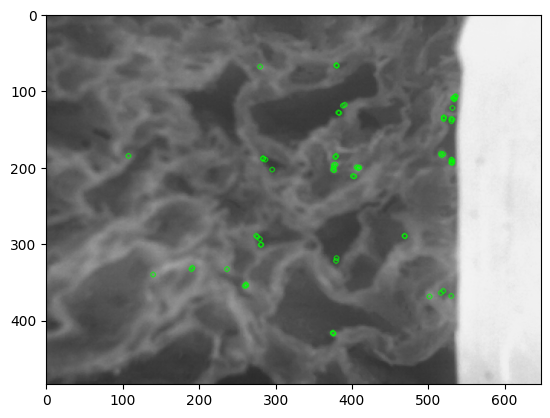

In [12]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Images/Default_0375_Mode2D_VideoImage.png', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints with ORB
keypoints = orb.detect(image, None)

# Compute the descriptors with ORB
keypoints, descriptors = orb.compute(image, keypoints)

# Draw the keypoints
image_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Show the image with keypoints
plt.imshow(image_keypoints)
plt.show()


In [10]:
import os
from PIL import Image, ImageDraw
import cv2
import numpy as np

directory = "Images2"
files = sorted(os.listdir(directory))

# Function to convert PIL image to OpenCV format
def pil_to_cv(pil_image):
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# Function to draw keypoints on PIL image
def draw_keypoints_pil(image, keypoints):
    draw = ImageDraw.Draw(image)
    for kp in keypoints:
        x, y = kp.pt
        draw.ellipse((x - 2, y - 2, x + 2, y + 2), fill='red')
    return image

try:
    ims = [Image.open(os.path.join(directory, f)).convert('L') for f in files]
    print(f"{len(ims)} Files Loaded")

    orb = cv2.ORB_create()

    # Process and draw keypoints on each image
    processed_images = []
    for pil_im in ims:
        # Convert PIL image to OpenCV format
        cv_im = pil_to_cv(pil_im)

        # Find the keypoints with ORB
        keypoints = orb.detect(cv_im, None)

        # Draw keypoints on the PIL image
        processed_im = draw_keypoints_pil(pil_im, keypoints)
        processed_images.append(processed_im)

    # Save the images as an animated GIF
    processed_images[0].save(
        'animated_keypoints.gif',
        save_all=True,
        append_images=processed_images[1:],
        duration=500,  # Duration between frames in milliseconds
        loop=0  # Loop forever
    )
    print("Animated GIF saved.")

except Exception as e:
    print("Files failed to load")
    print(e)


20 Files Loaded
Animated GIF saved.
